## DAY14 缺失值处理

⚠️先说说 None/NaN 的区别

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'A':[1,2,None], 
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [3]:
None_arr = np.array([1, None, 3, 4])
None_arr

array([1, None, 3, 4], dtype=object)

In [4]:
NaN_arr = np.array([1, np.NaN, 3, 4])
NaN_arr.dtype

dtype('float64')

https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |


Rubin在1976年把缺失值归为3类：
1. Missing Completely at Random（MCAR）
2. Missing at Random（MAR）
3. Missing NOT at Random（MNAR）

1. Missing Completely at Random（MCAR）

MCAR是指缺失值产生的原因完全随机，我们无法通过其他已知数据预测该缺失值。

2. Missing at Random（MAR）

MAR指的是缺失值可以用其他的列解释并预测。比如：你求婚失败了，你不知道为啥，那么你可能要关注一下其他的因子（变量），“她是否爱上别人了？”或者“老丈母娘不喜欢你”等等。

3. Missing NOT at Random（MNAR）

MNAR表示缺失值的产生有所原因，比如：一个人很胖，所以他不愿意提供自己的体重。

## 缺失值查看

介绍检查缺失值的简易方法：

- isnull()
- notnull()

In [5]:
df.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False


In [6]:
df.notnull()

,A,B,C
0,True,True,True
1,True,False,True
2,False,False,True


In [7]:
round(df.isnull().sum()/df.shape[0],2)

A    0.33
B    0.67
C    0.00
dtype: float64

In [8]:
df.isnull().sum()/df.shape[0]

A    0.333333
B    0.666667
C    0.000000
dtype: float64

In [9]:
df.isnull().sum(axis=1)/df.shape[1]

0    0.000000
1    0.333333
2    0.666667
dtype: float64

## 缺失值移除

一般缺失值占比在50%左右即可drop

In [10]:
df1 = df.copy()

In [11]:
df1.dropna() # 默认drop axis是行

,A,B,C
0,1.0,5.0,1


In [12]:
df1.dropna(axis=1)

,C
0,1
1,2
2,3


In [13]:
df1.dropna(axis='columns') # 跟上面一样

,C
0,1
1,2
2,3


In [14]:
df1  # inplace 没有设置成 True，所以对 df1 没有原地操作，不影响 df1 本身！

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [15]:
df1.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [16]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


## 缺失值填充

介绍几个填充缺失值的常用方法：

- fillna
- replace

In [17]:
df2 = df.copy()

In [18]:
# 固定值填充
df2.fillna(value='填充') 

,A,B,C
0,1.0,5.0,1
1,2.0,填充,2
2,填充,填充,3


In [19]:
# method='ffill'
df2.fillna(method = 'ffill') # 根据前一个值填充，如果第一个值就是nan，那此方法不适用。

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,2.0,5.0,3


In [20]:
# method='bfill'
df2.fillna(method = 'bfill') # 根据前一个值填充，如果最后的就是nan，那此方法不适用。

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [21]:
# replace
df2.replace(np.nan, -1)

,A,B,C
0,1.0,5.0,1
1,2.0,-1.0,2
2,-1.0,-1.0,3


In [22]:
# SimpleImputer

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df)
imputed_df = imp_mean.transform(df)  # return array

In [23]:
imputed_df

array([[1. , 5. , 1. ],
       [2. , 5. , 2. ],
       [1.5, 5. , 3. ]])

### 习题

In [24]:
url = 'https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv'
df = pd.read_csv(url)

In [25]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,NaN,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",NaN,NaN,67-64 FLEET STREET,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,NaN,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [26]:
(df.isnull().sum()/df.shape[0]).apply(lambda x: '{:.2f}%'.format(100*x))

DATE                               0.00%
TIME                               0.00%
BOROUGH                            5.24%
ZIP CODE                           5.26%
LATITUDE                           0.00%
LONGITUDE                          0.00%
LOCATION                           0.00%
ON STREET NAME                    14.58%
CROSS STREET NAME                 15.57%
OFF STREET NAME                   89.58%
NUMBER OF PERSONS INJURED          0.00%
NUMBER OF PERSONS KILLED           0.00%
NUMBER OF PEDESTRIANS INJURED      0.00%
NUMBER OF PEDESTRIANS KILLED       0.00%
NUMBER OF CYCLISTS INJURED       100.00%
NUMBER OF CYCLISTS KILLED        100.00%
CONTRIBUTING FACTOR VEHICLE 1      0.00%
CONTRIBUTING FACTOR VEHICLE 2     14.86%
CONTRIBUTING FACTOR VEHICLE 3     95.85%
CONTRIBUTING FACTOR VEHICLE 4     99.19%
CONTRIBUTING FACTOR VEHICLE 5     99.81%
VEHICLE TYPE CODE 1                0.79%
VEHICLE TYPE CODE 2               20.81%
VEHICLE TYPE CODE 3               96.11%
VEHICLE TYPE COD

In [27]:
import missingno as msno

<AxesSubplot:>

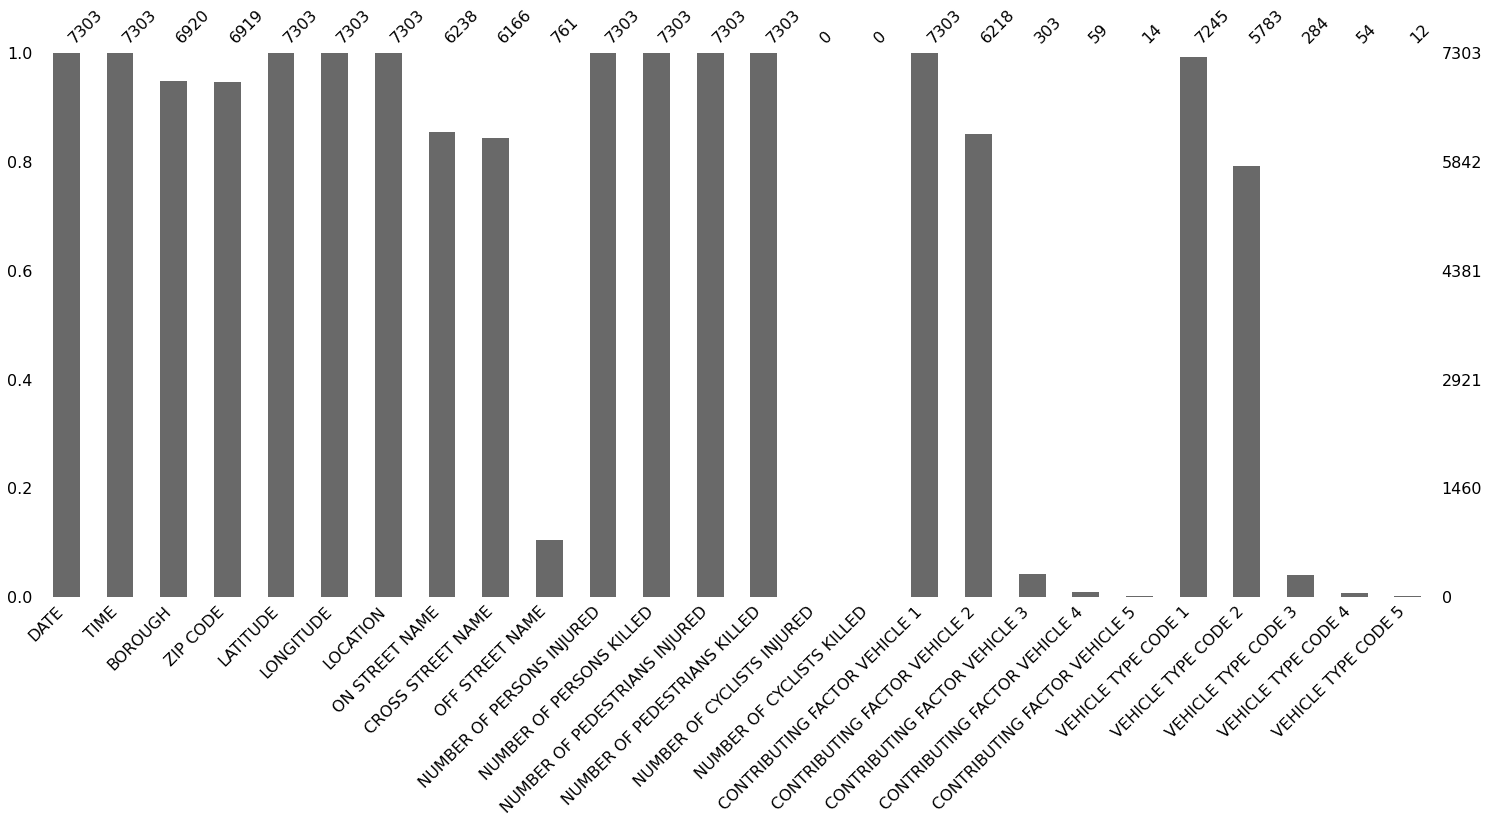

In [28]:
msno.bar(df) 

<AxesSubplot:>

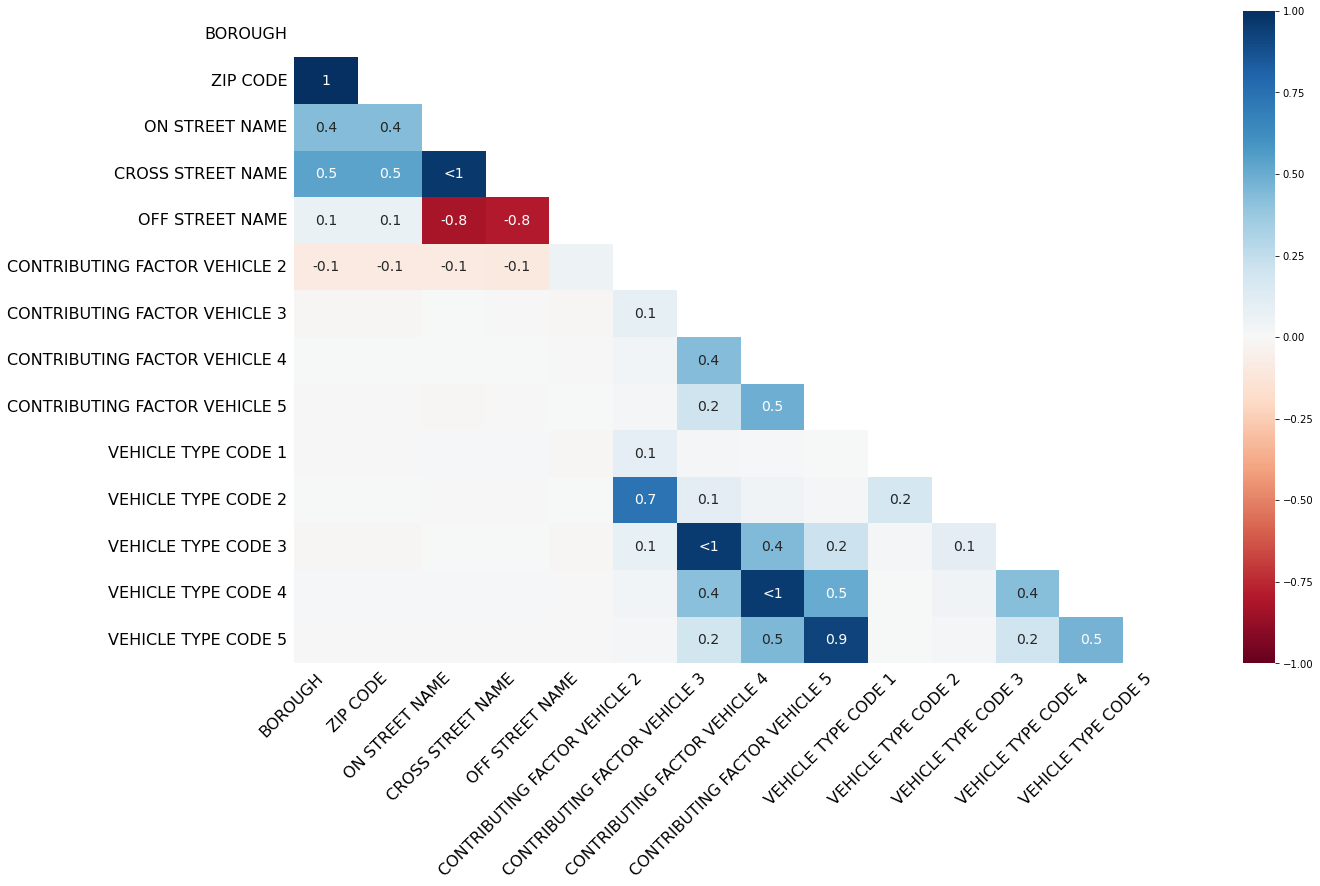

In [29]:
msno.heatmap(df)

<AxesSubplot:>

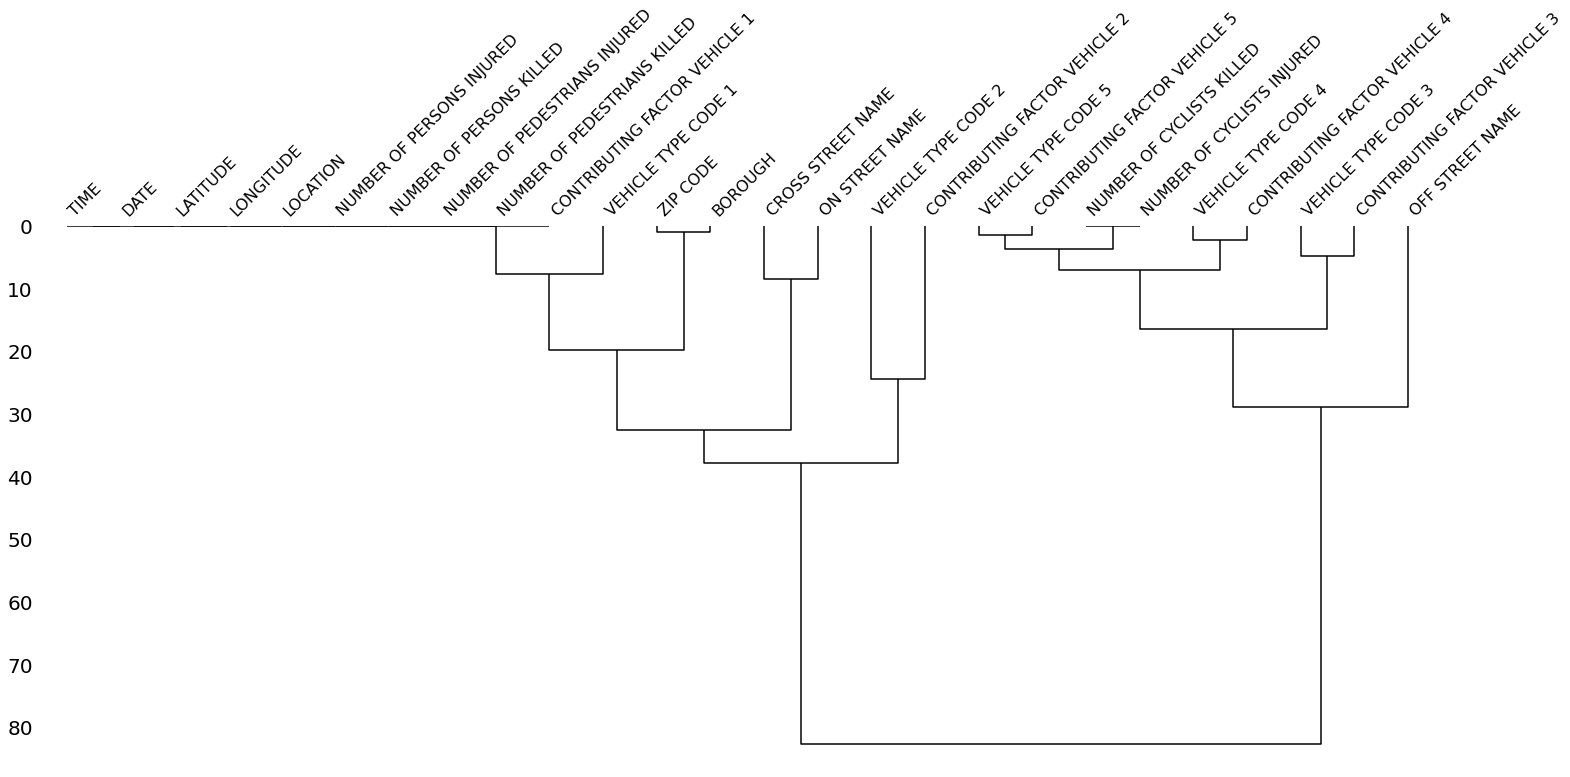

In [30]:
msno.dendrogram(df)